In [47]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm, gmean, cauchy, multivariate_normal
import seaborn as sns
# import plotly as py
# import plotly.graph_objs as go
# import cufflinks
# cufflinks.go_offline(connected=True)
#init_notebook_mode(connected=True)

%matplotlib inline

In [521]:
def import_stock_data(tickers, start = '2010-1-1'):
    data = pd.DataFrame()
    if len([tickers]) ==1:
        data[tickers] = wb.DataReader(tickers, data_source='yahoo', start = start)['Adj Close']
        data = pd.DataFrame(data)
    else:
        for t in tickers:
            data[t] = wb.DataReader(t, data_source='yahoo', start = start)['Adj Close']
    return(data)

In [687]:
data = import_stock_data(["MSFT","BAM"])

In [688]:
data.tail()

,MSFT,BAM
Date,,
2020-05-08,184.679993,33.400002
2020-05-11,186.740005,33.669998
2020-05-12,182.509995,32.500000
2020-05-13,179.750000,31.000000
2020-05-14,176.250000,30.040001


In [689]:
def log_returns(data):
    return (np.log(1+data.pct_change()))

In [690]:
log_return = log_returns(data)

In [691]:
def drift_calc(data, return_type='log'):
    if return_type=='log':
        lr = log_returns(data)
    elif return_type=='simple':
        lr = simple_returns(data)
    u = lr.mean()
    var = lr.var()
    drift = u-(0.5*var)
    try:
        return drift.values
    except:
        return drift

In [692]:
drif = drift_calc(data)
drif

array([0.00063468, 0.00043409])

In [693]:
covi = log_return.cov()
covi

,MSFT,BAM
MSFT,0.000250,0.000135
BAM,0.000135,0.000250


In [694]:
L = np.linalg.cholesky(covi)
L

array([[0.01582137, 0.        ],
       [0.00855895, 0.01328055]])

In [695]:
randi =norm.ppf(np.random.rand(2,2))
randi

array([[-0.63535887,  0.74412729],
       [-0.04965299, -1.12963893]])

In [696]:
V = L.dot(randi)

In [697]:
V[0]+drif[0]
V[1]+drif[1]

array([-0.00566333, -0.00819919])

In [698]:
def daily_returns(data, days, iterations, return_type='log'):
    ft = drift_calc(data, return_type)
    if return_type == 'log':
        try:
            stv = log_returns(data).std().values
        except:
            stv = log_returns(data).std()
    elif return_type=='simple':
        try:
            stv = simple_returns(data).std().values
        except:
            stv = simple_returns(data).std()    
    covall = log_return.cov()
    chol = np.linalg.cholesky(covall)
    numstocks = len(data.columns)
    
    randim = norm.ppf(np.random.rand(days,numstocks,iterations))
    V = chol.dot(randim)
    
    stocks = []
    for s in range(numstocks):
        dr = np.exp(ft[s] + stv[s] * V[s])
        stocks.append(dr)
    return stocks

In [699]:
xxx = daily_returns(data, days = 250, iterations = 10)
xxx

[array([[1.00063095, 1.00042563, 1.00072601, ..., 1.00085974, 1.00013756,
         1.00073716],
        [1.0005216 , 1.00103468, 1.00027371, ..., 1.00036319, 1.0006482 ,
         1.00067034],
        [1.00050731, 1.0005184 , 1.0005587 , ..., 1.00076939, 1.00073355,
         1.00123768],
        ...,
        [1.00097811, 1.00066512, 1.00064245, ..., 1.00084161, 1.00036875,
         1.00064948],
        [1.00090632, 1.00017733, 1.00037685, ..., 1.0009542 , 1.00096629,
         1.00024594],
        [1.00066723, 1.00019856, 1.00040366, ..., 1.00073135, 1.00061282,
         1.00045776]]),
 array([[1.00059664, 1.00050136, 1.0006171 , ..., 1.0006403 , 1.00021676,
         1.0006405 ],
        [1.00029186, 1.00083392, 0.99995482, ..., 1.00037867, 1.00024418,
         1.00033445],
        [1.00010908, 1.0006944 , 1.00068495, ..., 1.00066815, 1.00043831,
         1.00064332],
        ...,
        [1.00066348, 1.00063742, 1.00033304, ..., 1.00102092, 1.00008157,
         1.00038373],
        [1.0

In [812]:
def daily_returns(data, days, iterations, return_type='log'):
    ft = drift_calc(data, return_type)
    if return_type == 'log':
        try:
            stv = log_returns(data).std().values
        except:
            stv = log_returns(data).std()
    elif return_type=='simple':
        try:
            stv = simple_returns(data).std().values
        except:
            stv = simple_returns(data).std()   
    
    numstocks = len(data.columns)
    
    covall = log_return.cov()
    chol = np.linalg.cholesky(covall)
    
#     totals = []
#     for d in range(days):
#         uncorr_x = np.random.normal(0,1,(numstocks,iterations))
#         corr_x = np.dot(chol,uncorr_x)
#         df = pd.DataFrame(corr_x[0]).T
#         totals.append(df)
            #print(corr_x[0])
    simstock = np.zeros_like(5)
    for d in range(days):
        uncorr_x = np.random.normal(0,1,(2,5))
        corr_x = np.dot(chol,uncorr_x)
        row = (corr_x[0]).transpose()
        simstock = simstock+row
        print(row)
    
#     randim = norm.ppf(np.random.rand(days,numstocks,iterations))
#     V = chol.dot(randim)
    
#     stocks = []
#     for s in range(numstocks):
#         dr = np.exp(ft[s] + stv[s] * V[s])
#         stocks.append(dr)
#    return pd.DataFrame(totals)

In [813]:
xxx = daily_returns(data, days = 250, iterations = 10)
pd.DataFrame(xxx)

[-0.02798762  0.00095786 -0.00286049  0.01195356  0.01390655]
[ 0.00183776  0.00287248  0.00752141 -0.0081006  -0.0092608 ]
[-0.00685823  0.01189147 -0.03323479 -0.00680896 -0.0271409 ]
[ 0.02310806  0.00497634 -0.00284405 -0.01411448  0.00114843]
[ 0.01385737 -0.00391318  0.00827926  0.02361273  0.01237567]
[-0.00228244  0.0008686  -0.00014131  0.00983564 -0.00332632]
[ 0.00528386  0.00290303 -0.00445274 -0.00784282  0.01310952]
[-0.03828386  0.01942595 -0.01807462  0.00093317  0.00024271]
[0.0039186  0.00558545 0.00895796 0.05409972 0.01540161]
[-0.00114879  0.02167204 -0.01712268 -0.00415929  0.00804233]
[-0.00593376 -0.02069442  0.02082081 -0.01392585 -0.02519956]
[-0.01270916 -0.01686727  0.01219254 -0.00291816 -0.01472463]
[ 0.00227085  0.0018318  -0.00361256 -0.01019478 -0.00954079]
[ 3.35089373e-04 -9.97839035e-03  1.21668666e-02  2.65728287e-02
  7.20339085e-05]
[ 0.02617279 -0.01735791  0.00396194  0.01219799 -0.00223278]
[ 0.00758806 -0.00928369  0.01415692 -0.02140927 -0.01

""


In [681]:
stock1 = xxx[0]
stock2 = xxx[1]

In [682]:
price_list1 = np.zeros_like(stock1)
price_list2 = np.zeros_like(stock2)

In [683]:
price_list1[0] = data.iloc[-1,0]
price_list2[0] = data.iloc[-1,1]

In [684]:
for t in range(1,250):
    price_list1[t] = price_list1[t-1]*stock1[t]
    price_list2[t] = price_list2[t-1]*stock2[t]

IndexError: index 10 is out of bounds for axis 0 with size 10

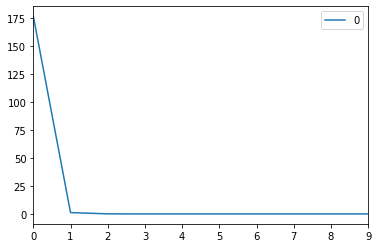

In [685]:
pd.DataFrame(price_list1).plot()

In [686]:
stv = log_returns(data).std()
stv.values

array([0.01582102, 0.01579913, 0.02508055])

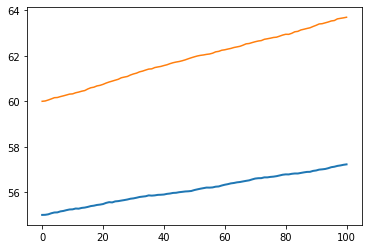

In [572]:
plt.plot(path_b, label = 'stock A', linewidth = 2)
plt.plot(path_a)

In [15]:
from scipy.stats import multivariate_normal
multivariate_normal.

In [626]:
np.random.multivariate_normal((log_return.mean()),covi,20)

array([[-0.03359063,  0.0203465 ],
       [-0.0121689 ,  0.00981183],
       [ 0.0170836 ,  0.00869911],
       [ 0.02294507,  0.00722137],
       [ 0.00447463,  0.0258734 ],
       [-0.00591023, -0.00898699],
       [ 0.01314865,  0.00510189],
       [ 0.01273059,  0.01416167],
       [-0.00710064, -0.01984411],
       [-0.02975933,  0.00459368],
       [-0.01437084,  0.00067072],
       [ 0.01294426,  0.02729374],
       [-0.02051075, -0.02345113],
       [ 0.0316306 ,  0.01259794],
       [-0.0016515 ,  0.00738523],
       [ 0.01201199, -0.00350337],
       [ 0.0131466 ,  0.01564099],
       [ 0.00770997, -0.00498231],
       [-0.0116516 ,  0.01359717],
       [ 0.01059225,  0.0138144 ]])